In [31]:
import pandas as pd 
import numpy as np

In [32]:
data = pd.read_csv('Salary.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [33]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [34]:
import matplotlib.pyplot as plt

In [35]:
X = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values
X.shape,y.shape

((35, 1), (35,))

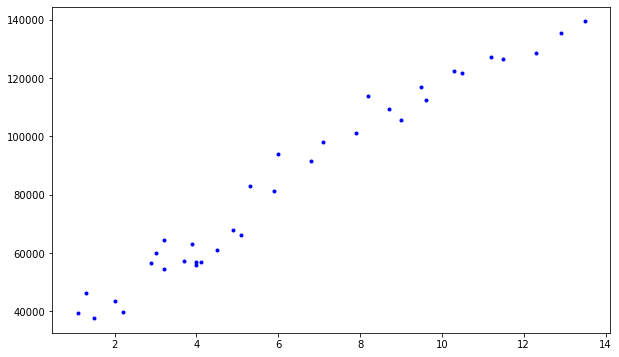

In [36]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'b.');

In [37]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

model.coef_[0],model.intercept_

(8672.224998455387, 29821.641348956095)

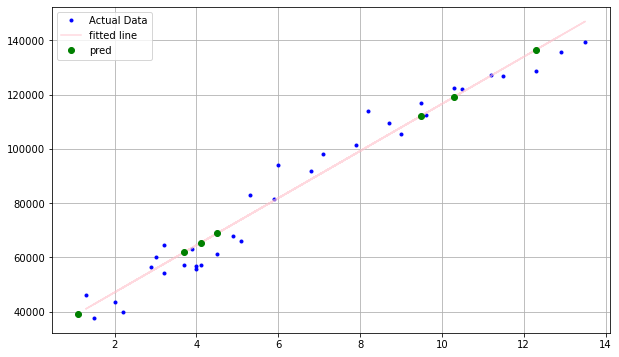

In [43]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'b.',label='Actual Data')
plt.plot(X_train,model.predict(X_train),alpha=.6,color='pink',label='fitted line')
plt.plot(X_test,y_pred,'go',label = 'pred')
plt.legend()
plt.grid();

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
import math
print('Mean ab error :%.2f' %mean_absolute_error(y_test,y_pred))
print('Mean abp error :%.2f' %mean_absolute_percentage_error(y_test,y_pred))
print('Mean sqr error :%.2f' %mean_squared_error(y_test,y_pred))
print('Mean Rsqr error :%.2f' %math.sqrt(mean_squared_error(y_test,y_pred)))
print('Coefficients of determination :%.2f' %r2_score(y_test,y_pred))

Mean ab error :5214.58
Mean abp error :0.07
Mean sqr error :34833149.10
Mean Rsqr error :5901.96
Coefficients of determination :0.97


/var/folders/c8/b0jnb3697678m1mpb_fwbxlw0000gp/T/ipykernel_52850/1668966439.py:54: UserWarning: No contour levels were found within the data range.
  ax2.contour(T0, T1, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)


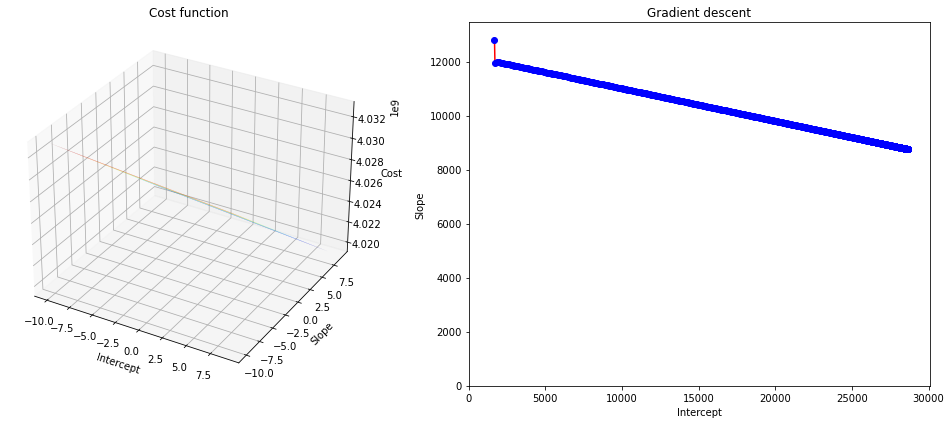

(array([28630.87140686,  8759.5328169 ]),
 35006768.19370177,
 8731.941047062497,
 28859.52619453144)

In [40]:
mse = mean_squared_error(y, y_pred)

# Linear Regression Parameters
slope = model.coef_[0]
intercept = model.intercept_

# Gradient Descent
# Initialize parameters
alpha = 0.01  # Learning rate
iters = 1000  # Number of iterations
theta = np.array([0.0, 0.0])  # Initial values of theta

# Implement Gradient Descent Function
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    J_history = np.zeros(iters)
    theta_history = np.zeros((iters,2))
    for i in range(iters):
        h = np.dot(X, theta)
        loss = h - y
        gradient = (2/m) * np.dot(X.T, loss)
        theta = theta - alpha * gradient
        J_history[i] = np.sum(loss**2) / (2 * m)
        theta_history[i,:] = theta.T
    return theta, J_history, theta_history

# Add a column of ones to X for the intercept term
X_gd = np.c_[np.ones((len(X), 1)), X]

# Run the gradient descent function
theta, J_history, theta_history = gradient_descent(X_gd, y, theta, alpha, iters)

# Create a grid for theta values
T0, T1 = np.meshgrid(range(-10, 10), range(-10, 10))

# Compute the cost function for each combination of T0 and T1
zs = np.array([np.sum((np.dot(X_gd, np.array([t0, t1])) - y)**2)/(2*len(y)) 
               for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
Z = zs.reshape(T0.shape)

# Plot Gradient Descent
fig = plt.figure(figsize=(14, 6))

# Subplot for cost function
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(T0, T1, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax1.set_xlabel('Intercept')
ax1.set_ylabel('Slope')
ax1.set_zlabel('Cost')
ax1.set_title('Cost function')

# Subplot for gradient descent
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax2.plot(theta_history[:,0], theta_history[:,1], 'r-')
ax2.plot(theta_history[:,0], theta_history[:,1], 'bo')
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Slope')
ax2.set_title('Gradient descent')

plt.tight_layout()
plt.show()

# Return the final parameters, mean squared error, and the initial slope and intercept
theta, mse, slope, intercept
